# `EDA : IMMIGRATION TO CANADA FROM 1980 TO 2013`



<img src = "https://www.un.org/development/desa/pd/sites/www.un.org.development.desa.pd/files/styles/panopoly_image_full/public/general/undesa_pd_image_international_migration_theme.jpg?itok=vuSBRmFW" align="center" width=900>

In [50]:
world_map

### `Feel free to zoom in and zoom out the map`





### `Details about the data`

* `Dataset Source`: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml).
* The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. 
* The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The Population Division of the United Nations compiled data pertaining to 45 countries.
* we will focus on the Canadian immigration data.The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx">here</a>.


 
---

## `TABLE OF CONTENT`

* Loading dataset
* Data wrangling
* Data Visuallization

**Install the `openpyxl`, a module which pandas requires to read in excel files with '.xlsx' format**

In [2]:
!pip install openpyxl --upgrade --quiet
!pip install folium --upgrade --quiet

**Import the helper libraries**

In [3]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library for relational datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline 

**Read the data using `read_excel` method**

In [4]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                        sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2, engine='openpyxl')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


**Let's check the number of rows and columns content in the df_can dataframe**

In [5]:
df_can.shape

(1013, 51)

It has 1031 rows and 51 columns

**Let's view the top 5 rows of the dataset using the `head()` function.**

In [6]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,...,3774.0,4331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**We can also veiw the bottom 5 rows of the dataset using the `tail()` function.**

In [7]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Let's walk through the short summary about the dataset using `info()` function.**

In [8]:
df_can.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Columns: 51 entries, Type to Unnamed: 50
dtypes: float64(45), object(6)
memory usage: 403.7+ KB


**To get the list of column headers we can call upon the dataframe's `.columns` parameter.**

In [9]:
df_can.columns.values 

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'], dtype=object)

**To get the list of indicies we use the `.index parameter`.**

In [10]:
df_can.index.values

array([   0,    1,    2, ..., 1010, 1011, 1012])

**Let's clean the data set to remove a few unnecessary columns. We can use pandas drop() method as follows:**

In [11]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage','Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,...,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,...,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0


**Let's rename the columns so that they make sense. We can use `rename()` method by passing in a dictionary of old and new names as follows:**

In [12]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns.values

array(['Country', 'Continent', 'Region', 'DevName', 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

**Add a `Total` column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:**

In [13]:
df_can['Total'] = df_can.sum(axis=1)
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0


**How many null objects we have in the dataset ?**

In [14]:
df_can.isnull().sum()

Country      816
Continent    816
Region       816
DevName      816
1980         816
1981         816
1982         816
1983         816
1984         816
1985         816
1986         816
1987         816
1988         816
1989         816
1990         816
1991         816
1992         816
1993         816
1994         816
1995         816
1996         816
1997         816
1998         816
1999         816
2000         816
2001         816
2002         816
2003         816
2004         816
2005         816
2006         816
2007         816
2008         816
2009         816
2010         816
2011         816
2012         816
2013         816
Total          0
dtype: int64

**Get rid of null values**

In [15]:
df_can.dropna(axis = 0,inplace =True)

**The defaul index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corressponding index value.
This can be fixed very easily by setting the `Country` column as the index using `set_index()` method.**

In [16]:
df_can.set_index('Country', inplace = True)

In [17]:
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0


**Remove the index name**

In [18]:
df_can.index.name = None

**Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.**

**To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.**

In [19]:
df_can.columns = list(map(str, df_can.columns))

**Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:**

In [20]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))

## `Visualizing Data using Matplotlib`

### `LINE PLOT`

**`Question1`: Plot a line graph of immigration from Haiti using `df.plot()`.**

In [21]:
print(plt.style.available)
mpl.style.use(['ggplot']) # for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [22]:
haiti = df_can.loc['Haiti',years]
haiti.index.astype(int)

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

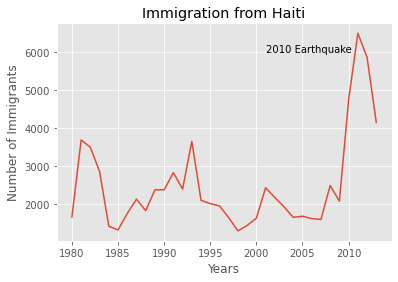

In [23]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(21, 6000, '2010 Earthquake') # see note below

plt.show() 

It appears till 1995 lots of more indians have immigrated to Canada as compared to China, between 1995 to 2005 a boost in immigration is seen from China.

**`Question2`: Compare the trend of top 5 countries that contributed the most to immigration to Canada.**

**Let's drop `Total` and `Unknown` from the dataframe. They may be typo.**

In [24]:
df_can.drop(['Total','Unknown'], inplace = True)

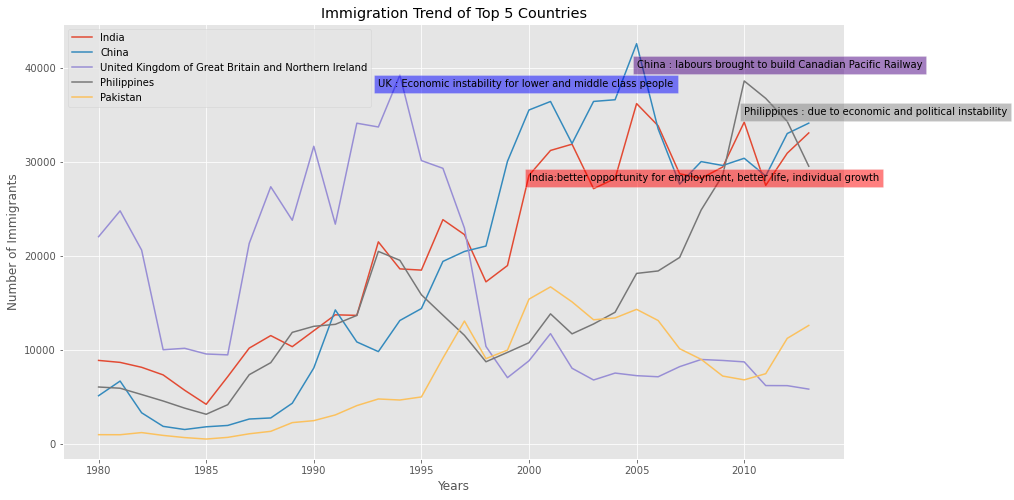

In [25]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head(5)

# transpose the dataframe
df_top5 = df_top5[years].transpose() 



#Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.text(1993,38000, 'UK : Economic instability for lower and middle class people',bbox=dict(facecolor='blue', alpha=0.5))
plt.text(2005,40000, 'China : labours brought to build Canadian Pacific Railway',bbox=dict(facecolor='indigo', alpha=0.5))
plt.text(2010, 35000, 'Philippines : due to economic and political instability',bbox=dict(facecolor='gray', alpha=0.5))
plt.text(2000, 28000, 'India:better opportunity for employment, better life, individual growth',bbox=dict(facecolor='red', alpha=0.5))


plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

**Immigration from `India` and `Philippines` is still increasing, followed by china where as immigration from UK and Pakistan is ceasing.**

### `AREA PLOT`

**`Question3:`Compare the trend of top 5 countries that contributed the most to immigration to Canada using area plot**

In [26]:
top5 = df_can.head() # extracting top 5 countries

top5 = top5[years].transpose() # switching columns with index
top5.index = top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting


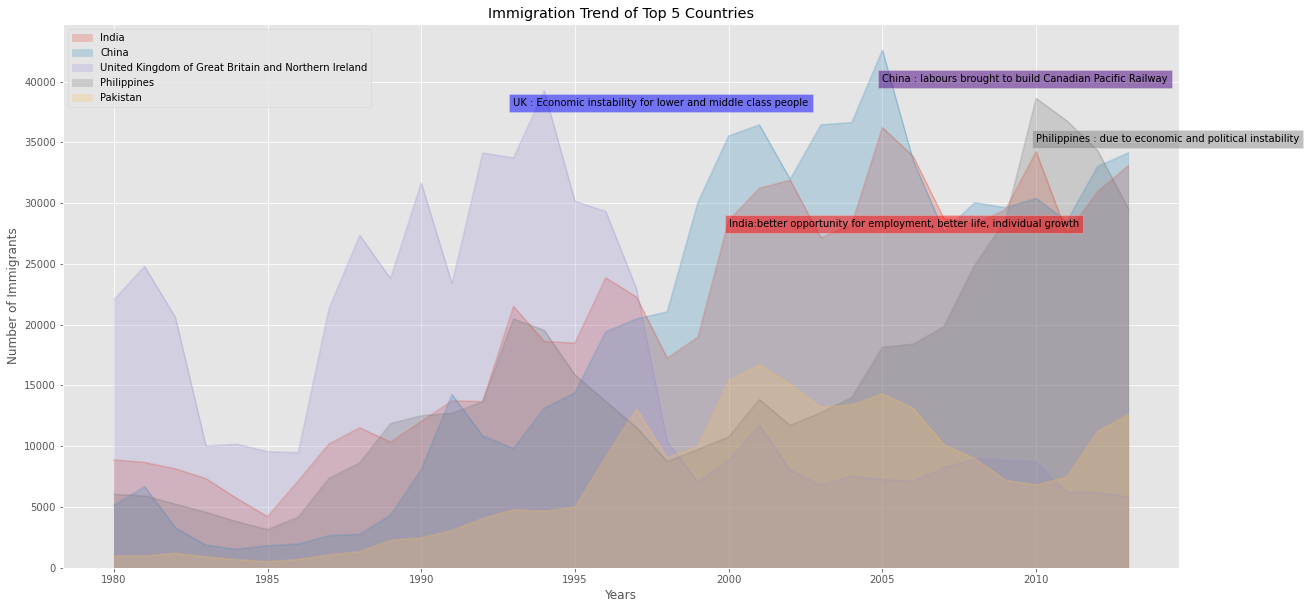

In [27]:
#  preferred option with more flexibility
ax = top5.plot(kind = 'area', alpha = 0.25, stacked = False, figsize = (20,10))
plt.text(1993,38000, 'UK : Economic instability for lower and middle class people',bbox=dict(facecolor='blue', alpha=0.5))
plt.text(2005,40000, 'China : labours brought to build Canadian Pacific Railway',bbox=dict(facecolor='indigo', alpha=0.5))
plt.text(2010, 35000, 'Philippines : due to economic and political instability',bbox=dict(facecolor='gray', alpha=0.5))
plt.text(2000, 28000, 'India:better opportunity for employment, better life, individual growth',bbox=dict(facecolor='red', alpha=0.5))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')
plt.show()

**`Question4:`Compare the trend of last 5 countries that immigration to Canada using area plot with transparency value 0.45**

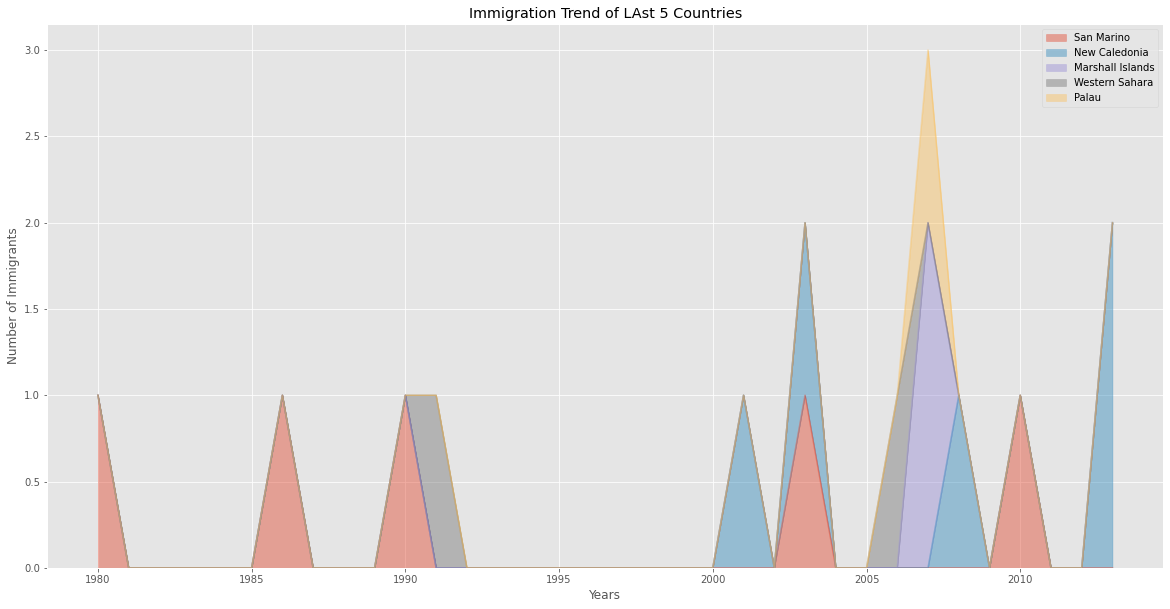

In [28]:
bottom5_df = df_can[years].tail().transpose() # extracting bottom 5 rows
bottom5_df.index = bottom5_df.index.map(int)

ax = bottom5_df.plot(kind='area', alpha=0.45, figsize=(20, 10))

ax.set_title('Immigration Trend of LAst 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')
plt.show()

### `HISTOGRAM`

**`Question5:` What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?**

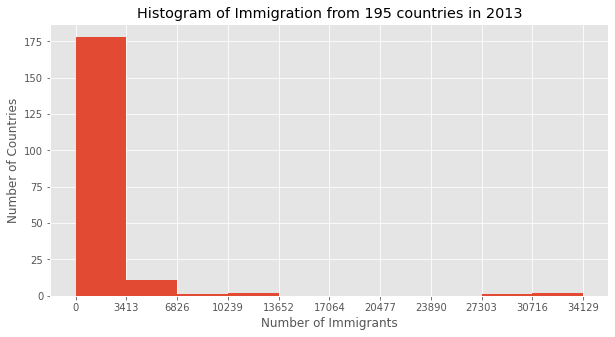

In [29]:
df_2013 = df_can['2013'] # extract immigration number for all countries in 2013
frequency, bin_edges = np.histogram(df_2013) # generating frequency and x_ticks for plotting

# plotting histogram

df_2013.plot(kind = 'hist', figsize = (10,5), xticks = bin_edges)
plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

**`Question6:` What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?**

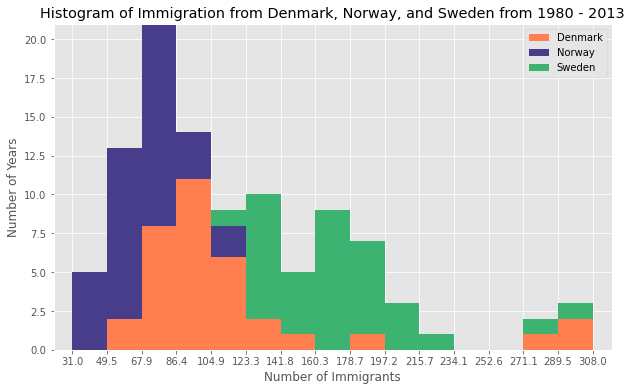

In [30]:
df_t = df_can.loc[['Denmark','Norway', 'Sweden'], years].transpose() # setting years as index and country names as the column

count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10
# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          xticks=bin_edges,
          stacked =True,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          xlim=(xmin, xmax) # to remove the extra gap on the edges of the plot
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

**`Question7`: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins .**

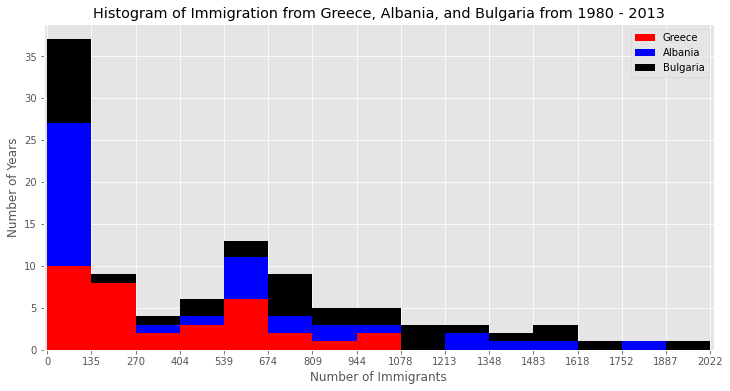

In [31]:
df_gab = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()

count, bin_edges = np.histogram(df_gab, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10

df_gab.plot(kind  = 'hist',
           bins = 15,
           figsize=(12, 6),
           xticks = bin_edges,
           stacked = True,
           xlim = (xmin, xmax),
           color = ['red', 'blue', 'black'])

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

### `BAR CHART`

**`Question8:` Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.**

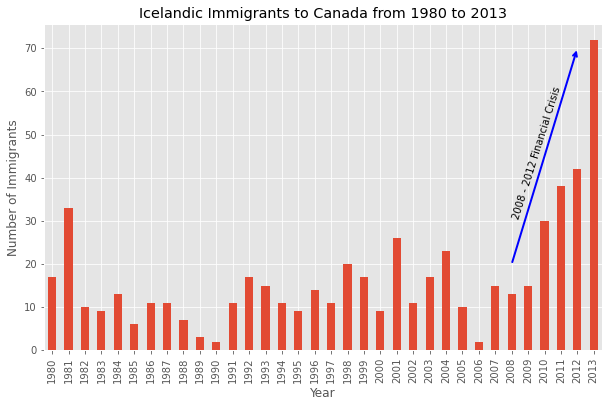

In [32]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2012 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

### `PIE CHART`

**`Question9:`Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.**

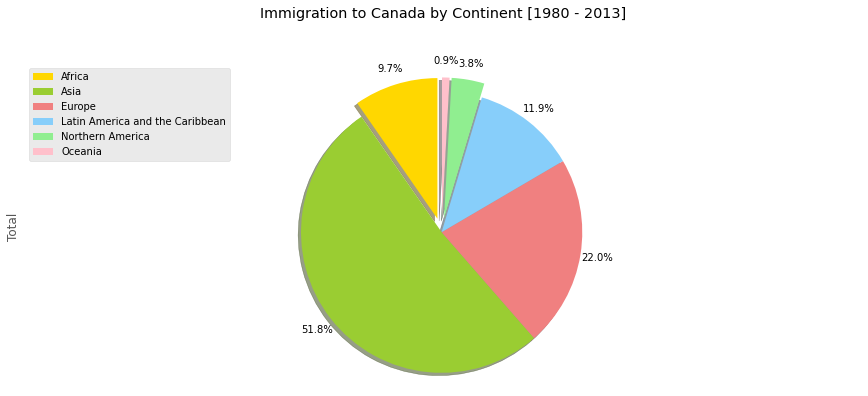

In [33]:
df_continents = df_can.groupby('Continent', axis = 0).sum()

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.starts from 90degree anticlockwise

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

**`Question10`: Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.**

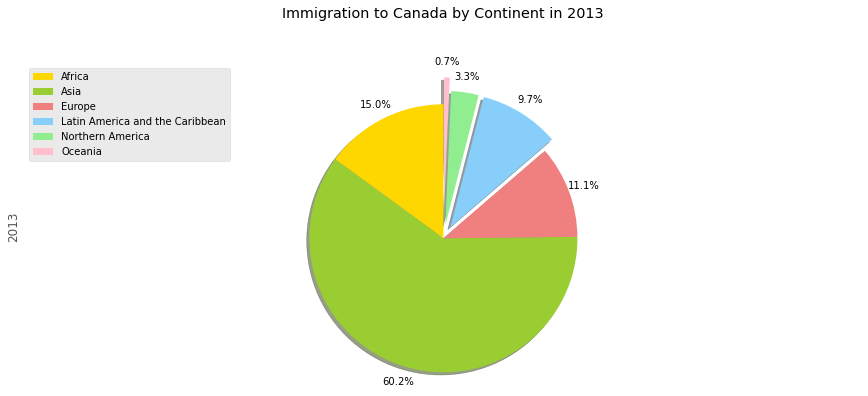

In [34]:
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2]
df_continents['2013'].plot(kind = 'pie',
                           startangle = 90,
                           shadow = True,
                           labels = None,
                           figsize = (15,6),
                           autopct = '%1.1f%%',
                           pctdistance = 1.12,
                           colors = colors_list,
                           explode = explode_list)

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

# show plot
plt.show()

### `BOX PLOT`

**`Question11:` Plot the box plot for the Japanese immigrants between 1980 - 2013.**

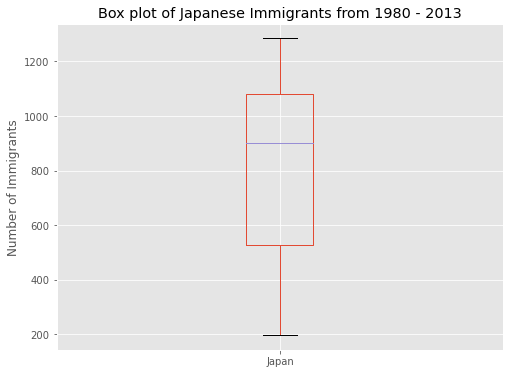

In [35]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()


**We can immediately make a few key observations from the plot above:**

1.  **The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).**
2.  **25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).**
3.  **75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).**

**We can view the actual numbers by calling the `describe()` method on the dataframe.**


In [36]:
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


**`Question12:`  perform a side by side comparison of the box plot with the line plot of China and India's immigration.**

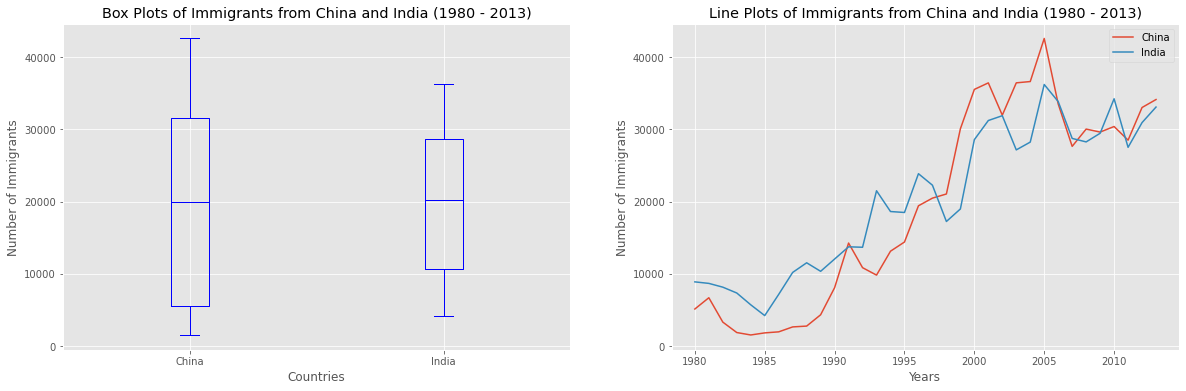

In [37]:
df_CI = df_can.loc[['China', 'India'], years].transpose()
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_ylabel('Number of Immigrants')
ax0.set_xlabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

**`Question13`: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.**

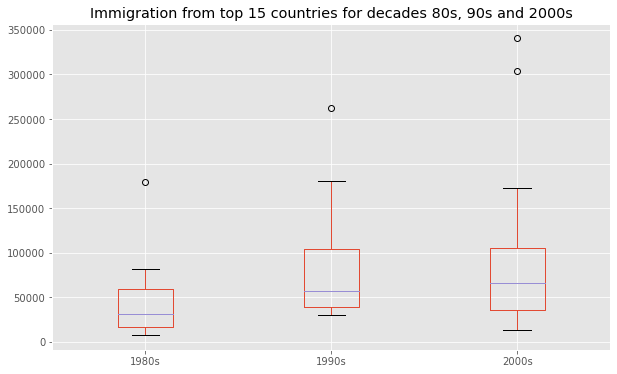

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


In [38]:
# Get the top 15 countries based on Total immigrant population. Name the dataframe df_top15.
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)

# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# plot box plot
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()
new_df.describe()

<b>
Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<br>

*   larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
*   smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade 2000s as an example: <br>

*   Q1 (25%) = 36,101.5 <br>
*   Q3 (75%) = 105,505.5 <br>
*   IQR = Q3 - Q1 = 69,404 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 \* 69,404) <br>
Outlier > 209,611.5
    </b>

In [39]:
# let's find out all the outliers 
stats = new_df.describe()
for decade in new_df :
    outlier_limit = stats.loc['75%', decade] + 1.5 * (stats.loc['75%', decade] - stats.loc['25%', decade])
    print(decade, 'outlier_limit:',outlier_limit)
    for country in new_df.index :
        if new_df.loc[country, decade] > outlier_limit :
                      print('->',country,':',new_df.loc[country, decade])
    print()

1980s outlier_limit: 122910.5
-> United Kingdom of Great Britain and Northern Ireland : 179171.0

1990s outlier_limit: 202240.25
-> United Kingdom of Great Britain and Northern Ireland : 261966.0

2000s outlier_limit: 209611.5
-> India : 303591.0
-> China : 340385.0



### `SCATTER PLOT`

**`Question14:` visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013 using scatter plot.**

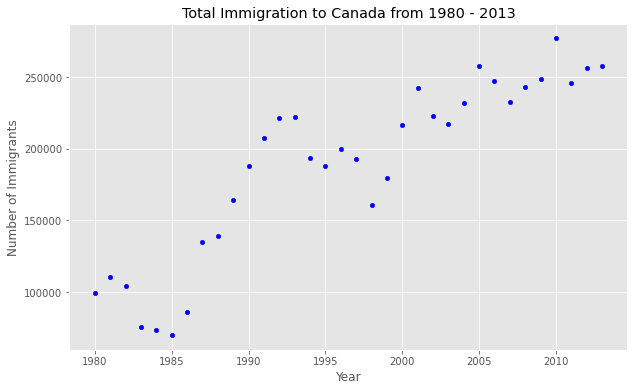

In [40]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='blue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

**We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases.
We can mathematically analyze this upward trend using a regression line (line of best fit).**

Text(1992, 150000, 'y=5567 x + -10926195')

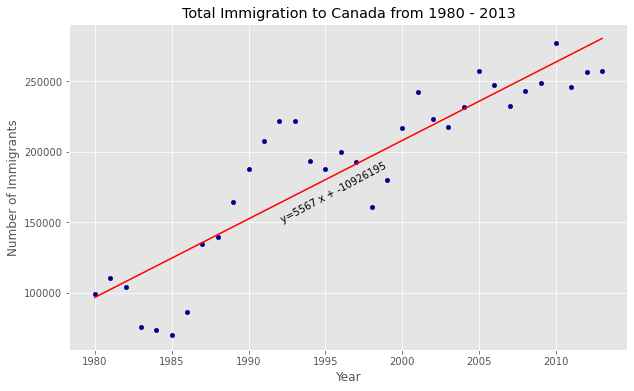

In [41]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(1992, 150000), rotation = 28)

<b>
    Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```

When compared to the actuals from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01), we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.
    </b>

### `Bubble Plots` 


**Let's start by analyzing the effect of Argentina's great depression**.

**Argentina suffered a great depression from 1998 - 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.**

**`Quesstion15:` Analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil.** 

In [42]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880.0,5123.0,22045.0,6051.0,978.0,9378.0,1172.0,185.0,1011.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1981,8670.0,6682.0,24796.0,5921.0,972.0,10030.0,1429.0,371.0,1456.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1982,8147.0,3308.0,20620.0,5249.0,1201.0,9074.0,1822.0,290.0,1572.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1983,7338.0,1863.0,10015.0,4562.0,900.0,7100.0,1592.0,197.0,1081.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1984,5704.0,1527.0,10170.0,3801.0,668.0,6661.0,1977.0,1086.0,847.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**`We will set the weights for the bubble as the normalized value of the population for each year.`**
There are several methods of normalizations in statistics, each with its own use. In this case, we will use [min-max](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) to bring all values into the range \[0,1]. The general formula is:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

where *`X`* is an original value, *`X'`* is the normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the datapoints are scaled to a value between 0-1 accordingly.


In [43]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

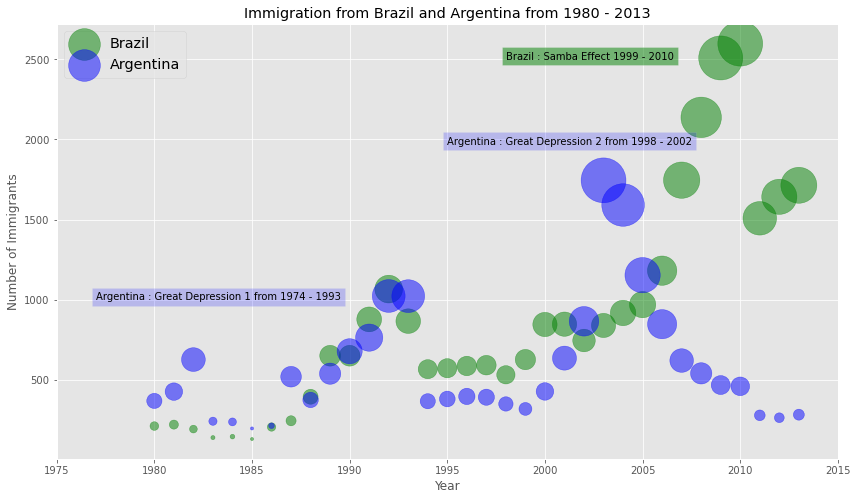

In [44]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

plt.text(1977,1000, 'Argentina : Great Depression 1 from 1974 - 1993',bbox=dict(facecolor='blue', alpha=0.2))
plt.text(1995,1970, 'Argentina : Great Depression 2 from 1998 - 2002',bbox=dict(facecolor='blue', alpha=0.2))
plt.text(1998,2500, 'Brazil : Samba Effect 1999 - 2010',bbox=dict(facecolor='green', alpha=0.5))

plt.show()

<b>
    The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble, the more immigrants in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, `Argentina had suffered a great depression` from 1974 - 1990, just before the onset of 1998 - 2002 great depression.

On another side, `Brazil` suffered the `Samba Effect` where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.
</b>

### `Choropleth map`

**Now, let's create our own Choropleth map of the world depicting immigration from various countries to Canada.**

In [45]:
# download countries geojson file
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json


In [46]:
df_can.index.name = 'Country'
df_can.reset_index(inplace = True)
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada from 1980 to 2013',
    reset=True
)
world_map

/opt/conda/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


### `Feel free to zoom in and zoom out the map`

## `CONCLUSIONS`
### We compared the immigration pertaining to 195 countries to canada between 1980 - 2013, using various visualizations and here are few of the insights :
* We found huge jump in immigration from Haiti beacuse of the Earthquake in 2010.
* India, China, UK and Northern Ireland, Phillipines and Pakistan are the top 5 countries from where more than 240000 people had been migrated to Canada.
* It had been observed that the immigration from India, china and Philippines was increasing, where as the immigration from UK and Pakistan ceased.
* In 2013, less than 5000 people migrated from over 176 countries and over 60% of the immigrates were Asians.
* Over 1980-2013, more than 50% of the immigrants were Asians.
* Overall the annual immigration to Canada was increading.
* From 2008 onwards, the total number of immigrants were increasing from Iceland.
* Using bubble plot we verified the effect on immigration of Argentines due to Argentina's Great Depression and Brazilians due to Brazil's Smabha Effect.

## `Reference`
* https://www.coursera.org/learn/python-for-data-visualization

In [47]:
!pip install jovian --upgrade --quiet

In [51]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="immgration-to-canada-from-1980-to-2013")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
